In [8]:
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
from numpy import NaN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skfuzzy.cluster import cmeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [2]:
warnings.simplefilter("ignore")

In [3]:
url = "https://raw.githubusercontent.com/AndresBeta123/ProyectoDataMining-2023/main/title_complete_preprocesado.csv"
title_complete_preprocesado = pd.read_csv(url)

In [4]:
url = "https://raw.githubusercontent.com/AndresBeta123/ProyectoDataMining-2023/main/principals_complete_preprocesado.csv"
principals_complete_preprocesado = pd.read_csv(url)

# Asociacion

In [27]:
def generarMatrizDeAsociacion(data):
    all_items = set()
    for items_str in data:
        items_list = [item.strip() for item in items_str.split(',')]
        all_items.update(items_list)

    # Crear un diccionario para almacenar los datos
    data_dict = {}
    for item in all_items:
        data_dict[item] = []

    # Llenar el diccionario con los valores True/False
    for items_str in data:
        #data_dict['ID'].append(tid)
        items_list = [item.strip() for item in items_str.split(',')]
        for item in all_items:
            data_dict[item].append(item in items_list)

    # Crear un DataFrame a partir del diccionario
    return pd.DataFrame(data_dict)

In [28]:
def ReglasDeAsociacionApriori(df,support,confidence):
    frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='lift')
    rules = rules[rules['confidence'] >= confidence]
    rules.sort_values(by='confidence')
    display(rules)

In [29]:
def ReglasDeAsociacionfpgrowth(df,support,confidence):
    frequent_itemsets = fpgrowth(df, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='lift')
    rules = rules[rules['confidence'] >= confidence]
    rules.sort_values(by='confidence')
    display(rules)

In [30]:
data_generes_notNaN = title_complete_preprocesado['genres'].dropna()
data_generes_NaN = title_complete_preprocesado['genres'].fillna('sinGenero')

Matrix_generes_notNaN = generarMatrizDeAsociacion(data_generes_notNaN)
Matrix_generes_NaN = generarMatrizDeAsociacion(data_generes_NaN)

In [31]:
minSupport = 0.0001
minConfidence = 0.5

## Apriori

In [32]:
ReglasDeAsociacionApriori(Matrix_generes_notNaN,minSupport,minConfidence)

antecedents     consequents  antecedent support  \
3                    (War)         (Drama)            0.020575   
28               (Romance)         (Drama)            0.109404   
37                 (Crime)         (Drama)            0.087794   
43             (Film-Noir)         (Drama)            0.002629   
87             (Biography)   (Documentary)            0.034770   
90                  (News)   (Documentary)            0.002062   
126            (Film-Noir)         (Crime)            0.002629   
163         (Romance, War)         (Drama)            0.001981   
172       (War, Biography)         (Drama)            0.000624   
176        (Thriller, War)         (Drama)            0.000594   
194     (History, Western)         (Drama)            0.000182   
196     (Romance, History)         (Drama)            0.001531   
198     (Musical, History)         (Drama)            0.000257   
210    (Thriller, History)         (Drama)            0.000480   
217      (Action, History)         (Drama)            0.001796   
225       (Music, History)   (Documentary)            0.000749   
243        (News, History)   (Documentary)            0.000531   
263       (Sport, History)   (Documentary)            0.000367   
270       (Music, Western)         (Drama)            0.001378   
290         (Music, Crime)         (Drama)            0.000853   
322   (Romance, Biography)         (Drama)            0.000919   
326     (Romance, Mystery)         (Drama)            0.002115   
328       (Romance, Crime)         (Drama)            0.004195   
342       (Romance, Sport)         (Drama)            0.000812   
380  (Thriller, Biography)         (Drama)            0.000182   
382     (Biography, Crime)         (Drama)            0.001841   
398          (Drama, News)   (Documentary)            0.000239   
420     (Thriller, Family)         (Drama)            0.000233   
462     (Drama, Film-Noir)         (Crime)            0.002226   
464     (Film-Noir, Crime)         (Drama)            0.002094   
466            (Film-Noir)  (Drama, Crime)            0.002629   
468         (Sport, Crime)         (Drama)            0.000242   
525     (Music, Biography)   (Documentary)            0.003070   
551     (Musical, Western)        (Comedy)            0.000176   
608      (Horror, Musical)        (Comedy)            0.000301   
648    (Action, Animation)     (Adventure)            0.003750   
749     (Sport, Adventure)   (Documentary)            0.000337   
759      (News, Biography)   (Documentary)            0.000158   
783    (Family, Biography)   (Documentary)            0.000865   
787     (Sport, Biography)   (Documentary)            0.001569   

     consequent support   support  confidence       lift  leverage  \
3              0.452487  0.012928    0.628335   1.388627  0.003618   
28             0.452487  0.063941    0.584445   1.291628  0.014437   
37             0.452487  0.048298    0.550126   1.215783  0.008572   
43             0.452487  0.002226    0.846765   1.871359  0.001036   
87             0.179404  0.017433    0.501373   2.794651  0.011195   
90             0.179404  0.001969    0.955137   5.323933  0.001599   
126            0.087794  0.002094    0.796822   9.076013  0.001864   
163            0.452487  0.001647    0.831325   1.837237  0.000751   
172            0.452487  0.000391    0.626794   1.385221  0.000109   
176            0.452487  0.000322    0.542714   1.199402  0.000054   
194            0.452487  0.000104    0.573770   1.268038  0.000022   
196            0.452487  0.001199    0.783626   1.731820  0.000507   
198            0.452487  0.000134    0.523256   1.156400  0.000018   
210            0.452487  0.000310    0.645963   1.427584  0.000093   
217            0.452487  0.001029    0.573090   1.266534  0.000217   
225            0.179404  0.000558    0.745020   4.152739  0.000424   
243            0.179404  0.000531    1.000000   5.573997  0.000436   
263            0.179404  0.000272    0.739837   

In [33]:
ReglasDeAsociacionApriori(Matrix_generes_NaN,minSupport,minConfidence)

antecedents     consequents  antecedent support  \
3                    (War)         (Drama)            0.019887   
32               (Romance)         (Drama)            0.105750   
41                 (Crime)         (Drama)            0.084862   
47             (Film-Noir)         (Drama)            0.002541   
93             (Biography)   (Documentary)            0.033609   
96                  (News)   (Documentary)            0.001993   
132            (Film-Noir)         (Crime)            0.002541   
169         (Romance, War)         (Drama)            0.001915   
178       (War, Biography)         (Drama)            0.000603   
182        (Thriller, War)         (Drama)            0.000574   
200     (Western, History)         (Drama)            0.000176   
202     (Romance, History)         (Drama)            0.001479   
204     (Musical, History)         (Drama)            0.000248   
216    (Thriller, History)         (Drama)            0.000464   
223      (Action, History)         (Drama)            0.001736   
231       (Music, History)   (Documentary)            0.000724   
249        (News, History)   (Documentary)            0.000513   
269       (Sport, History)   (Documentary)            0.000355   
276       (Music, Western)         (Drama)            0.001332   
296         (Music, Crime)         (Drama)            0.000825   
328   (Romance, Biography)         (Drama)            0.000888   
332     (Romance, Mystery)         (Drama)            0.002045   
334       (Romance, Crime)         (Drama)            0.004055   
350       (Romance, Sport)         (Drama)            0.000784   
388  (Thriller, Biography)         (Drama)            0.000176   
391     (Crime, Biography)         (Drama)            0.001779   
408          (Drama, News)   (Documentary)            0.000231   
430     (Thriller, Family)         (Drama)            0.000225   
472     (Drama, Film-Noir)         (Crime)            0.002151   
474     (Film-Noir, Crime)         (Drama)            0.002024   
476            (Film-Noir)  (Drama, Crime)            0.002541   
478         (Sport, Crime)         (Drama)            0.000234   
535     (Music, Biography)   (Documentary)            0.002968   
565     (Musical, Western)        (Comedy)            0.000170   
622      (Horror, Musical)        (Comedy)            0.000291   
664    (Action, Animation)     (Adventure)            0.003625   
765     (Sport, Adventure)   (Documentary)            0.000326   
775      (News, Biography)   (Documentary)            0.000153   
799    (Family, Biography)   (Documentary)            0.000836   
803     (Sport, Biography)   (Documentary)            0.001517   

     consequent support   support  confidence       lift  leverage  \
3              0.437372  0.012496    0.628335   1.436616  0.003798   
32             0.437372  0.061805    0.584445   1.336265  0.015553   
41             0.437372  0.046685    0.550126   1.257799  0.009568   
47             0.437372  0.002151    0.846765   1.936030  0.001040   
93             0.173412  0.016851    0.501373   2.891230  0.011022   
96             0.173412  0.001903    0.955137   5.507921  0.001558   
132            0.084862  0.002024    0.796822   9.389667  0.001809   
169            0.437372  0.001592    0.831325   1.900729  0.000754   
178            0.437372  0.000378    0.626794   1.433092  0.000114   
182            0.437372  0.000311    0.542714   1.240852  0.000060   
200            0.437372  0.000101    0.573770   1.311860  0.000024   
202            0.437372  0.001159    0.783626   1.791669  0.000512   
204            0.437372  0.000130    0.523256   1.196364  0.000021   
216            0.437372  0.000300    0.645963   1.476919  0.000097   
223            0.437372  0.000995    0.573090   1.310303  0.000236   
231            0.173412  0.000539    0.745020   4.296251  0.000414   
249            0.173412  0.000513    1.000000   5.766626  0.000424   
269            0.173412  0.000262    0.739837   

## FP-Growth

In [34]:
ReglasDeAsociacionfpgrowth(Matrix_generes_notNaN,minSupport,minConfidence)

antecedents     consequents  antecedent support  \
0                (Romance)         (Drama)            0.109404   
30        (Romance, Sport)         (Drama)            0.000812   
50          (Sport, Crime)         (Drama)            0.000242   
59      (Sport, Biography)   (Documentary)            0.001569   
65        (Sport, History)   (Documentary)            0.000367   
71      (Sport, Adventure)   (Documentary)            0.000337   
74                  (News)   (Documentary)            0.002062   
80           (Drama, News)   (Documentary)            0.000239   
85         (News, History)   (Documentary)            0.000531   
91       (News, Biography)   (Documentary)            0.000158   
149            (Biography)   (Documentary)            0.034770   
171    (Family, Biography)   (Documentary)            0.000865   
174   (Romance, Biography)         (Drama)            0.000919   
176     (Crime, Biography)         (Drama)            0.001841   
188  (Thriller, Biography)         (Drama)            0.000182   
287                  (War)         (Drama)            0.020575   
315         (Romance, War)         (Drama)            0.001981   
330        (Thriller, War)         (Drama)            0.000594   
336       (War, Biography)         (Drama)            0.000624   
345                (Crime)         (Drama)            0.087794   
358       (Romance, Crime)         (Drama)            0.004195   
394     (Thriller, Family)         (Drama)            0.000233   
426     (Romance, History)         (Drama)            0.001531   
435       (Music, History)   (Documentary)            0.000749   
440    (Thriller, History)         (Drama)            0.000480   
443      (Action, History)         (Drama)            0.001796   
616       (Music, Western)         (Drama)            0.001378   
620     (History, Western)         (Drama)            0.000182   
631     (Musical, Western)        (Comedy)            0.000176   
688     (Romance, Mystery)         (Drama)            0.002115   
773     (Music, Biography)   (Documentary)            0.003070   
792         (Music, Crime)         (Drama)            0.000853   
868    (Action, Animation)     (Adventure)            0.003750   
958     (Musical, History)         (Drama)            0.000257   
962      (Horror, Musical)        (Comedy)            0.000301   
965            (Film-Noir)         (Drama)            0.002629   
966            (Film-Noir)         (Crime)            0.002629   
972     (Drama, Film-Noir)         (Crime)            0.002226   
974     (Film-Noir, Crime)         (Drama)            0.002094   
976            (Film-Noir)  (Drama, Crime)            0.002629   

     consequent support   support  confidence       lift  leverage  \
0              0.452487  0.063941    0.584445   1.291628  0.014437   
30             0.452487  0.000471    0.580882   1.283755  0.000104   
50             0.452487  0.000149    0.617284   1.364203  0.000040   
59             0.179404  0.000895    0.570342   3.179086  0.000614   
65             0.179404  0.000272    0.739837   4.123851  0.000206   
71             0.179404  0.000212    0.628319   3.502246  0.000151   
74             0.179404  0.001969    0.955137   5.323933  0.001599   
80             0.179404  0.000224    0.937500   5.225622  0.000181   
85             0.179404  0.000531    1.000000   5.573997  0.000436   
91             0.179404  0.000155    0.981132   5.468827  0.000127   
149            0.179404  0.017433    0.501373   2.794651  0.011195   
171            0.179404  0.000483    0.558621   3.113750  0.000328   
174            0.452487  0.000764    0.831169   1.836891  0.000348   
176            0.452487  0.001011    0.549433   1.214251  0.000178   
188            0.452487  0.000107    0.590164   1.304268  0.000025   
287            0.452487  0.012928    0.628335   1.388627  0.003618   
315            0.452487  0.001647    0.831325   1.837237  0.000751   
330            0.452487  0.000322    0.542714   

In [35]:
ReglasDeAsociacionfpgrowth(Matrix_generes_NaN,minSupport,minConfidence)

antecedents     consequents  antecedent support  \
0                (Romance)         (Drama)            0.105750   
32        (Romance, Sport)         (Drama)            0.000784   
52          (Sport, Crime)         (Drama)            0.000234   
61      (Sport, Biography)   (Documentary)            0.001517   
67        (Sport, History)   (Documentary)            0.000355   
73      (Sport, Adventure)   (Documentary)            0.000326   
76                  (News)   (Documentary)            0.001993   
82           (Drama, News)   (Documentary)            0.000231   
87         (News, History)   (Documentary)            0.000513   
93       (News, Biography)   (Documentary)            0.000153   
151            (Biography)   (Documentary)            0.033609   
173    (Family, Biography)   (Documentary)            0.000836   
176   (Romance, Biography)         (Drama)            0.000888   
179     (Crime, Biography)         (Drama)            0.001779   
192  (Thriller, Biography)         (Drama)            0.000176   
295                  (War)         (Drama)            0.019887   
323         (Romance, War)         (Drama)            0.001915   
338        (Thriller, War)         (Drama)            0.000574   
344       (War, Biography)         (Drama)            0.000603   
353                (Crime)         (Drama)            0.084862   
366       (Romance, Crime)         (Drama)            0.004055   
402     (Thriller, Family)         (Drama)            0.000225   
436     (Romance, History)         (Drama)            0.001479   
445       (Music, History)   (Documentary)            0.000724   
450    (Thriller, History)         (Drama)            0.000464   
453      (Action, History)         (Drama)            0.001736   
626       (Music, Western)         (Drama)            0.001332   
630     (Western, History)         (Drama)            0.000176   
641     (Musical, Western)        (Comedy)            0.000170   
700     (Romance, Mystery)         (Drama)            0.002045   
787     (Music, Biography)   (Documentary)            0.002968   
806         (Music, Crime)         (Drama)            0.000825   
884    (Action, Animation)     (Adventure)            0.003625   
976     (Musical, History)         (Drama)            0.000248   
980      (Horror, Musical)        (Comedy)            0.000291   
983            (Film-Noir)         (Drama)            0.002541   
984            (Film-Noir)         (Crime)            0.002541   
990     (Drama, Film-Noir)         (Crime)            0.002151   
992     (Film-Noir, Crime)         (Drama)            0.002024   
994            (Film-Noir)  (Drama, Crime)            0.002541   

     consequent support   support  confidence       lift  leverage  \
0              0.437372  0.061805    0.584445   1.336265  0.015553   
32             0.437372  0.000456    0.580882   1.328120  0.000113   
52             0.437372  0.000144    0.617284   1.411348  0.000042   
61             0.173412  0.000865    0.570342   3.288950  0.000602   
67             0.173412  0.000262    0.739837   4.266366  0.000201   
73             0.173412  0.000205    0.628319   3.623278  0.000148   
76             0.173412  0.001903    0.955137   5.507921  0.001558   
82             0.173412  0.000216    0.937500   5.406212  0.000176   
87             0.173412  0.000513    1.000000   5.766626  0.000424   
93             0.173412  0.000150    0.981132   5.657822  0.000123   
151            0.173412  0.016851    0.501373   2.891230  0.011022   
173            0.173412  0.000467    0.558621   3.221357  0.000322   
176            0.437372  0.000738    0.831169   1.900371  0.000350   
179            0.437372  0.000978    0.549433   1.256214  0.000199   
192            0.437372  0.000104    0.590164   1.349341  0.000027   
295            0.437372  0.012496    0.628335   1.436616  0.003798   
323            0.437372  0.001592    0.831325   1.900729  0.000754   
338            0.437372  0.000311    0.542714   

# Clustering

In [5]:
import sklearn.cluster as sk
import sklearn.metrics as skm

In [13]:
def plotPoints(dataset,k):
    data_clustered =  sk.KMeans(n_clusters=k, random_state=0,verbose = 0).fit(dataset)
    all_preds = data_clustered.inertia_
    all_clusters = data_clustered.cluster_centers_
    display(all_preds)
    display(all_clusters)
    plt.figure(figsize=(6,6))
    plt.scatter(np.array(dataset)[:,0],np.array(dataset)[:,1],c='b')
    plt.scatter(all_clusters[:,0],all_clusters[:,1],c="r")

In [6]:
def MedidasDeDistancia(data_for_clustering,k):
    data_clustered =  sk.KMeans(n_clusters=k, random_state=0,verbose = 0).fit(data_for_clustering)
    all_preds = data_clustered.inertia_
    all_clusters = data_clustered.cluster_centers_
    labels = data_clustered.labels_
    ssb = 0
    for j in range(k):
        cluster_data = data_for_clustering[labels == j]
        centroid = all_clusters[j]
        ssb += len(cluster_data) * np.sum((centroid - np.mean(data_for_clustering, axis=0)) ** 2)
    ssw = data_clustered.inertia_
    silhouette = skm.silhouette_score(data_for_clustering, data_clustered.labels_)
    dbi_score = skm.davies_bouldin_score(data_for_clustering,data_clustered.labels_)
    return ssb,ssw,silhouette,dbi_score

In [7]:
def plot_Codo(data,k):
    K = range(2,k)
    X = np.array(data)

    Sum_of_squared_distances = []
    Sum_of_squared_Between = []
    SilhouetteS = []
    Dbis = []
    data = data.dropna()

    for i in K:
        ssb,ssw,silhouette,dbi_score =  MedidasDeDistancia(data,i)
        Sum_of_squared_distances.append(ssw)
        Sum_of_squared_Between.append(ssb)
        SilhouetteS.append(silhouette)
        Dbis.append(dbi_score)
    plt.plot(K, Sum_of_squared_distances, 'bx-',label = 'SSW')
    plt.xlabel('k')
    plt.ylabel('SSW')
    plt.show()
    plt.plot(K, Sum_of_squared_Between, 'ro-',label = 'SSB')
    plt.xlabel('k')
    plt.ylabel('SSB')
    plt.show()
    plt.plot(K, SilhouetteS, 'bo-',label = 'silhouette')
    plt.xlabel('k')
    plt.ylabel('silhouette')
    plt.show()
    plt.plot(K, Dbis, 'rx-',label = 'dbi_score')
    plt.xlabel('k')
    plt.ylabel('dbi_score')
    plt.show()

In [9]:
def fuzzy_clustering_analysis(data, k, fuzziness_values):
    metrics = []  # Matriz para almacenar los resultados

    best_silhouette = -1
    best_config = {'n_clusters': None, 'fuzziness': None}

    for fuzziness in fuzziness_values:
        metric_fuzziness = []  # Almacena los resultados de una iteración para un valor de fuzziness

        for n_clusters in range(2, k+1):
            centers, u, _, _, _, _, _ = cmeans(data.T, n_clusters, fuzziness, error=0.00, maxiter=1000)
            datosFMC = pd.DataFrame(u.T)
            centroides = centers
            matriz_pertenencia = datosFMC.values

            SSW = 0
            for i in range(n_clusters):
                for j in range(len(data)):
                    SSW += sum(matriz_pertenencia[j, i] * fuzziness * skm.pairwise.euclidean_distances([centroides[i]], [data.iloc[j]])[0] * 2)

            SSB = 0
            for i in range(n_clusters):
                SSB += sum(matriz_pertenencia[:, i] * fuzziness *  skm.pairwise.euclidean_distances([centroides[i]], [centroides.mean(axis=0)])[0] * 2)

            labels = np.argmax(u, axis=0)
            dbi_score = skm.davies_bouldin_score(data, labels)
            silhouette_avg = skm.silhouette_score(data, labels)

            # Almacena los resultados en la matriz para este valor de fuzziness
            metric_fuzziness.append([SSB, SSW, silhouette_avg, dbi_score])

            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_config['n_clusters'] = n_clusters
                best_config['fuzziness'] = fuzziness

        metrics.append(metric_fuzziness)  # Agrega los resultados de un valor de fuzziness a la matriz de resultados

    print("\nMejor configuración encontrada:")
    print(f"n_clusters={best_config['n_clusters']}, fuzziness={best_config['fuzziness']}")

    # Graficar los resultados
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    metric_names = ['SSB', 'SSW', 'Silhouette', 'Dbi']

    for i, ax in enumerate(axs):
        for idx, metric_fuzziness in enumerate(metrics):
            values = [x[i] for x in metric_fuzziness]
            ax.plot(range(2, k+1), values, marker='o', label=f"Fuzziness {fuzziness_values[idx]}")

        ax.set_xlabel('k')
        ax.set_ylabel(metric_names[i])
        ax.legend()

    plt.tight_layout()
    plt.show()

In [10]:
def hierarchical_clustering_analysis(data, k):

    SilhouetteS = []
    Dbis = []

    best_silhouette = -1
    best_config = {'n_clusters': None}

    for n_clusters in range(2, k+1):
        clustering = sk.AgglomerativeClustering(n_clusters=n_clusters)
        labels = clustering.fit_predict(data)

        dbi_score = skm.davies_bouldin_score(data, labels)
        silhouette_avg = skm.silhouette_score(data, labels)


        SilhouetteS.append(silhouette_avg)
        Dbis.append(dbi_score)

        print(f"Configuración: n_clusters={n_clusters}")
        print("Índice de Davies-Bouldin (DBI):", dbi_score)
        print("Coeficiente de Silueta:", silhouette_avg)
        print("-------------------------------")

        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_config['n_clusters'] = n_clusters


    plt.plot(range(2, k+1), SilhouetteS, 'bo-', label='Silhouette')
    plt.xlabel('k')
    plt.ylabel('Silhouette')
    plt.show()

    plt.plot(range(2, k+1), Dbis, 'rx-', label='Dbi')
    plt.xlabel('k')
    plt.ylabel('dbi')
    plt.show()

    print("\nMejor configuración encontrada:")
    print(f"n_clusters={best_config['n_clusters']}")

In [22]:
title_complete_fracmented = title_complete_preprocesado.sample(frac=0.1)
dimensiones = ['runtimeMinutes','averageRating','numVotes']
data_for_clustering = title_complete_fracmented[dimensiones].copy()

### Kmeans

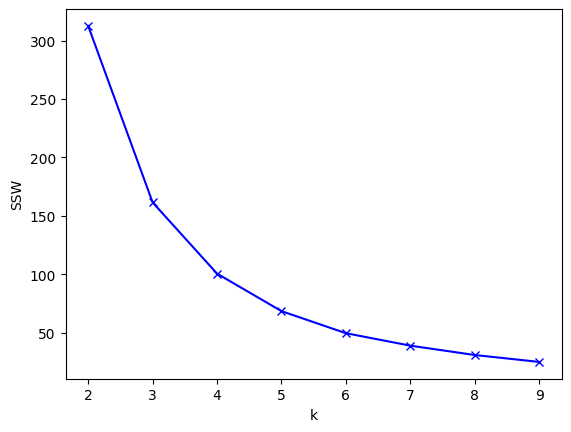

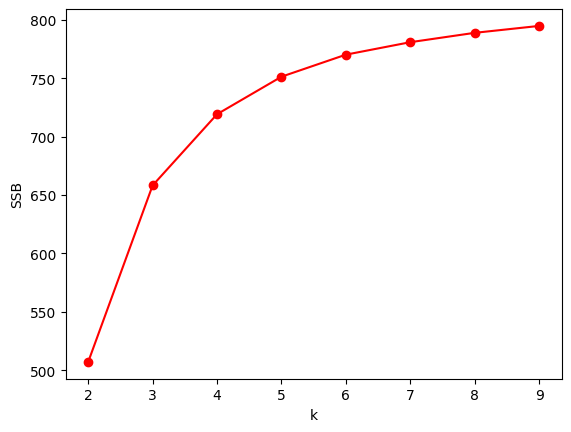

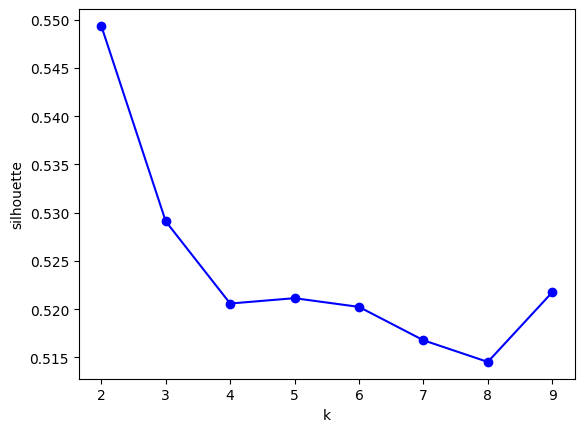

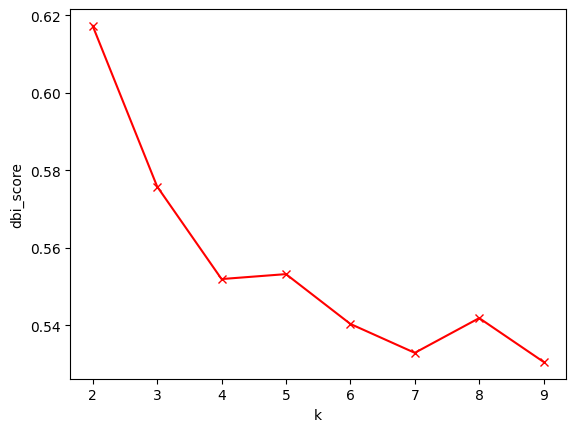

In [36]:
plot_Codo(data_for_clustering,10)

### Fuzzy


Mejor configuración encontrada:
n_clusters=2, fuzziness=1.5


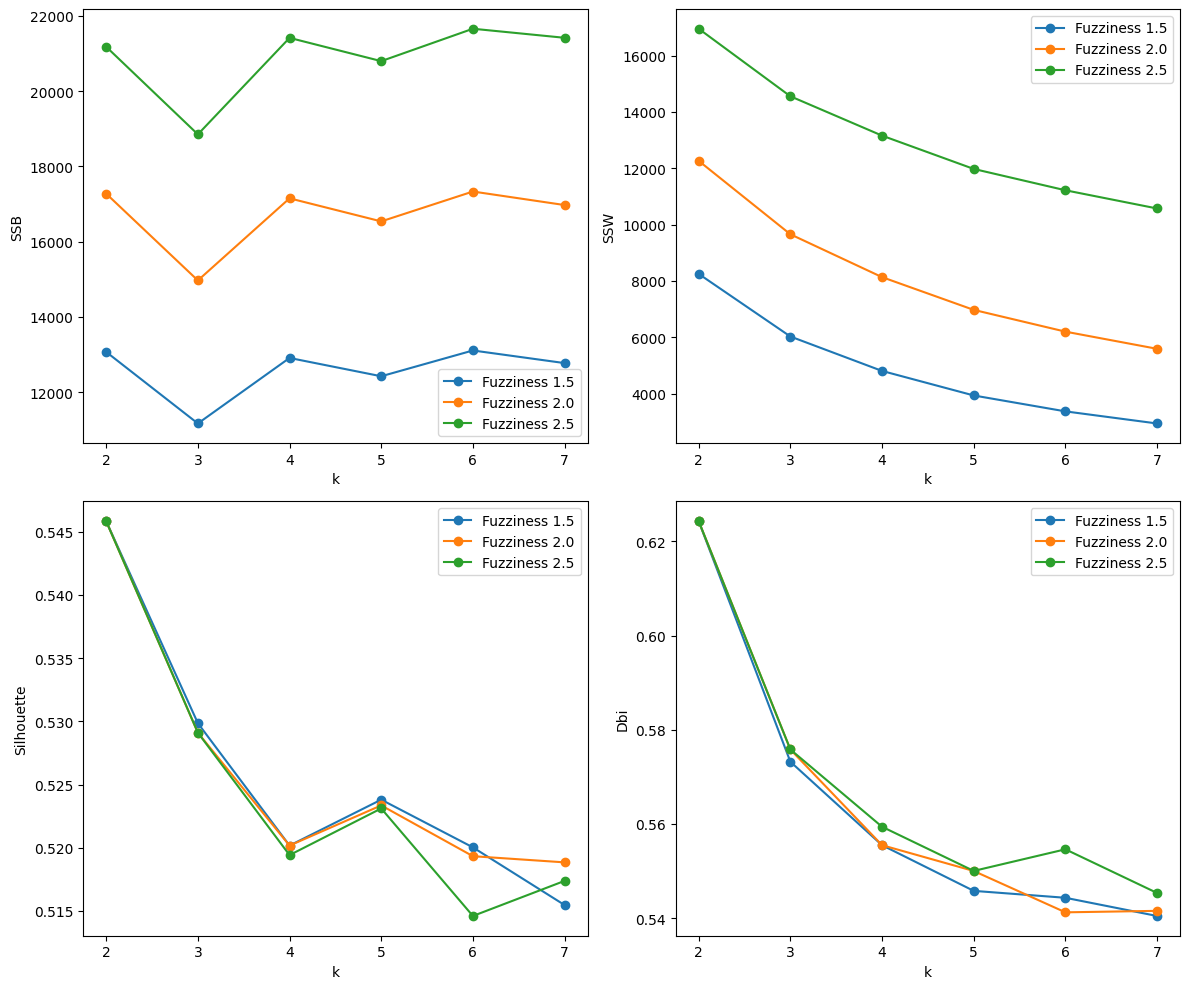

In [37]:
k_clusters = 7  # Valor máximo para el número de clusters
fuzziness_values = [1.5, 2.0 , 2.5]  # Valores de fuzziness a probar
fuzzy_clustering_analysis(data_for_clustering, k_clusters, fuzziness_values)

### Hierarchical clustering

Configuración: n_clusters=2
Índice de Davies-Bouldin (DBI): 0.6340489163408635
Coeficiente de Silueta: 0.53552707348188
-------------------------------
Configuración: n_clusters=3
Índice de Davies-Bouldin (DBI): 0.5724958150741398
Coeficiente de Silueta: 0.5045049016684059
-------------------------------
Configuración: n_clusters=4
Índice de Davies-Bouldin (DBI): 0.5621623510728353
Coeficiente de Silueta: 0.5032965294756392
-------------------------------
Configuración: n_clusters=5
Índice de Davies-Bouldin (DBI): 0.5789541049866405
Coeficiente de Silueta: 0.488799479210591
-------------------------------
Configuración: n_clusters=6
Índice de Davies-Bouldin (DBI): 0.5677058979846884
Coeficiente de Silueta: 0.47594458258010747
-------------------------------


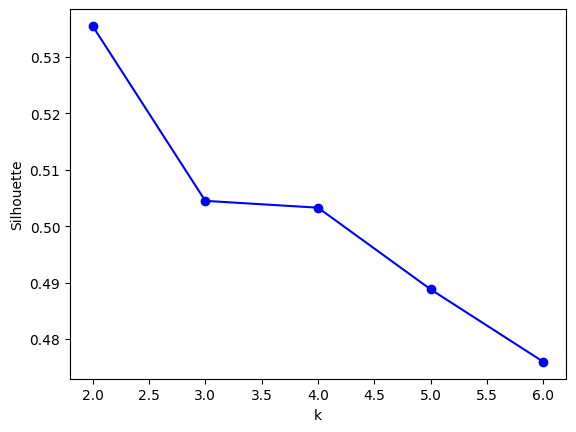

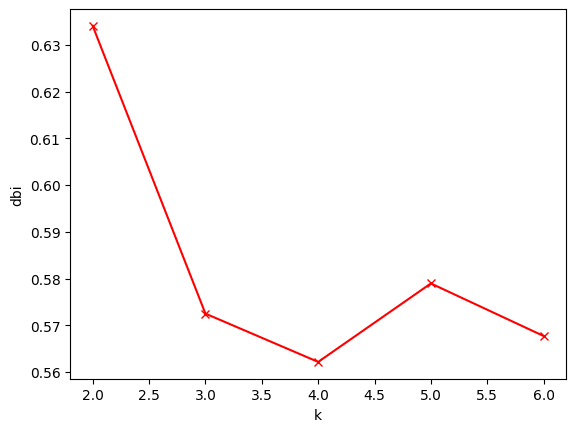


Mejor configuración encontrada:
n_clusters=2


In [38]:
k_clusters = 6  # Valor máximo para el número de clusters
hierarchical_clustering_analysis(data_for_clustering, k_clusters)